# 感知机（Perception）

定义（感知机）：假设输入空间（特征空间）是 $\Chi \subset R^n$，输出空间是 $y = \{+1, -1\} $。输入 $x \in \Chi$ 表示实例的特征向量，对应于输出空间（特征空间）的点；输出 $ y \in Y$表述实例的类别。由输入空间到输出空间的如下函数，

$$
f(x) = sign(w · x + b)
$$
称为 $\textbf{感知机}$。

## 感知机学习策略
感知机是分类模型，对于高维的数据，它希望通过数据训练出表示超平面的参数$w$和$b$，找到一个超平面将线性可分的数据分开。训练数据需要定义所谓的损失函数，并将这个损失函数极小化。基本上，所有目前主流的机器学习算法都遵循这个流程。
感知机的损失函数定义为：
$$
L(w, b) = -\sum_{x_i \in M} y_i(w · x_i + b)
$$
也就是对所有错分的点，用标签乘以其到超平面的距离（乘积一定小于0）求和。
损失函数也可以改为对所有样本的求和，注意到，对正确的样本，其感知机预测标签和训练集标签的差为0，可定义：
$$
L(w, b) = -\sum_{x_i \in T} (y_i - d_i)(w·x_i +b)
$$
其中$d_i$表示感知机预测标签。
## 感知机学习算法
最优化问题：
对给定的训练数据集
$$
T = \{ (x_1, y_1), (x_2, y_2) \dots (x_n, y_n)\}
$$
其中，$x_i \in \Chi = R^n$, $y_i = Y = \{+1, -1\}$，$i = 1, 2 \dots n$，求参数$w$，$b$，使其为以下损失函数极小化问题的解
$$
\underset{w, b}{\min} L(w, b) = -\sum_{x_i \in M} y_i(w \cdot x_i + b)
$$
其中$M$为误分类点的集合。

算法（梯度下降法）：
输入：训练数据集$T = \{ (x_1, y_1), (x_2, y_2) \dots (x_n, y_n)\}$

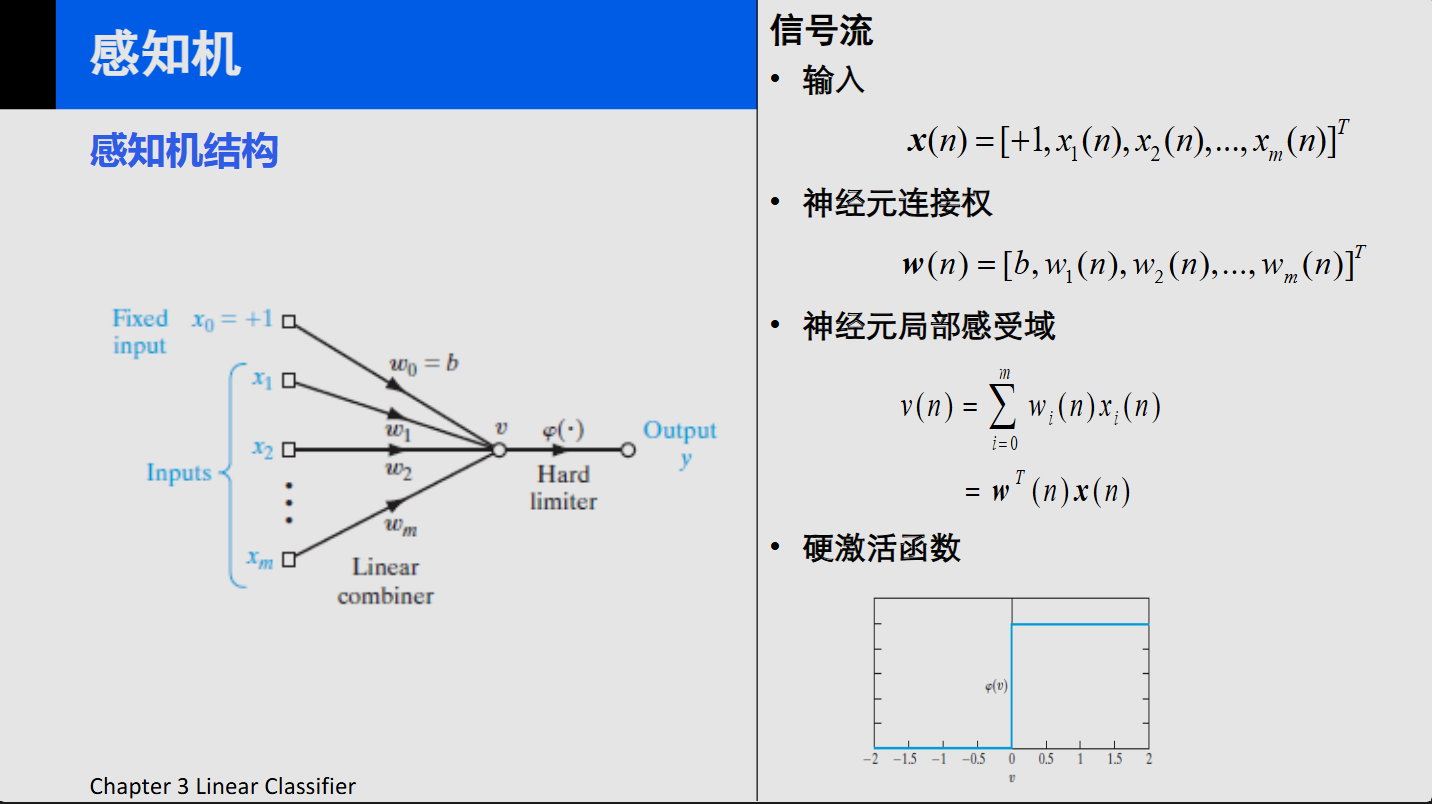


# 感知机算法实现解读

## 解决的问题
这段代码实现了一个**简单的二分类线性分类器**——感知机，用于解决**线性可分的二分类问题**。它能够自动从数据中学习到一个决策边界，将不同类别的数据点分开。

## 核心思想
基于**错误驱动学习**的原则：
- 初始化一个随机的决策超平面
- 遍历训练数据，只关注被错误分类的样本
- 当发现分类错误时，调整决策边界的方向，使其更接近正确分类
- 重复这个过程直到所有样本都被正确分类或达到最大迭代次数

## 算法特点
1. **简单高效**：只需基本的线性代数运算
2. **在线学习**：可以逐个样本处理，适合流式数据
3. **保证收敛**：对于线性可分数据，能在有限步内收敛
4. **直观易懂**：权重更新规则有清晰的几何解释

## 应用场景
- 简单的文本分类（垃圾邮件检测）
- 图像二分类（猫 vs 狗）
- 任何线性可分的模式识别任务

这个实现展示了机器学习中最基础的"从错误中学习"的概念，是理解更复杂神经网络模型的重要基础。

=== Perceptron Training ===
Starting perceptron training...
Iteration 1: Errors 13
Iteration 2: Errors 1
Iteration 3: Errors 0
Perfect classification! Training completed

=== Making Predictions ===
Test points: [[ 1  1]
 [-1 -1]
 [ 2 -1]]
Predictions: [ 1 -1  1]


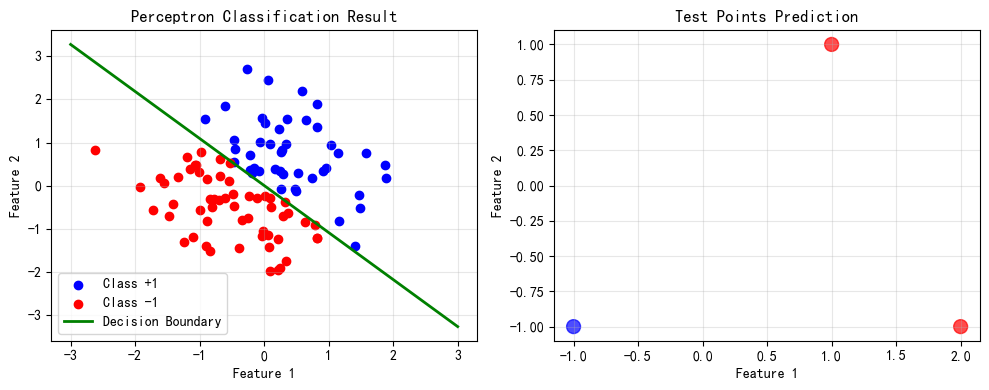

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simplest Perceptron implementation - without using class!
def train_perceptron(X, y, learning_rate=0.1, max_iters=100):
    """
    Train perceptron (simplest version)
    Returns: trained weight vector
    """
    # Add bias term
    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
    
    # Initialize weights
    weights = np.zeros(X_with_bias.shape[1])
    
    print("Starting perceptron training...")
    for iteration in range(max_iters):
        total_errors = 0
        
        # Iterate through each sample
        for i in range(len(X)):
            # Calculate prediction score
            score = np.dot(weights, X_with_bias[i])
            prediction = 1 if score >= 0 else -1
            
            # If prediction is wrong, update weights
            if prediction != y[i]:
                weights += learning_rate * y[i] * X_with_bias[i]
                total_errors += 1
        
        print(f"Iteration {iteration + 1}: Errors {total_errors}")
        
        # If no errors, finish early
        if total_errors == 0:
            print("Perfect classification! Training completed")
            break
    
    return weights

def predict_perceptron(X, weights):
    """Use trained weights for prediction"""
    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
    predictions = []
    
    for i in range(len(X)):
        score = np.dot(weights, X_with_bias[i])
        prediction = 1 if score >= 0 else -1
        predictions.append(prediction)
    
    return np.array(predictions)

# Generate test data
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)  # Simple linear classification

# Usage! Super simple!
print("=== Perceptron Training ===")
trained_weights = train_perceptron(X, y, learning_rate=0.1)

print("\n=== Making Predictions ===")
test_points = np.array([[1, 1], [-1, -1], [2, -1]])
predictions = predict_perceptron(test_points, trained_weights)

print("Test points:", test_points)
print("Predictions:", predictions)

# Visualization
plt.figure(figsize=(10, 4))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='Class -1')

# Plot decision boundary
x_plot = np.linspace(-3, 3, 100)
if trained_weights[2] != 0:  # Avoid division by zero
    y_plot = (-trained_weights[0] - trained_weights[1] * x_plot) / trained_weights[2]
    plt.plot(x_plot, y_plot, 'g-', linewidth=2, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Classification Result')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot test points
plt.subplot(1, 2, 2)
plt.scatter(test_points[:, 0], test_points[:, 1], c=predictions, 
           cmap='bwr', s=100, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Points Prediction')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()